# EfficinetNet

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fantacher/neu-metal-surface-defects-data")

print("Path to dataset files:", path)

100%|██████████| 57.4M/57.4M [00:01<00:00, 30.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fantacher/neu-metal-surface-defects-data/versions/1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"
valid_dir = "/content/drive/MyDrive/valid"

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [8]:
for image_batch , labels_batch in train_generator :
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 260, 260, 3)
(32, 6)


In [9]:
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [10]:
#making functions
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

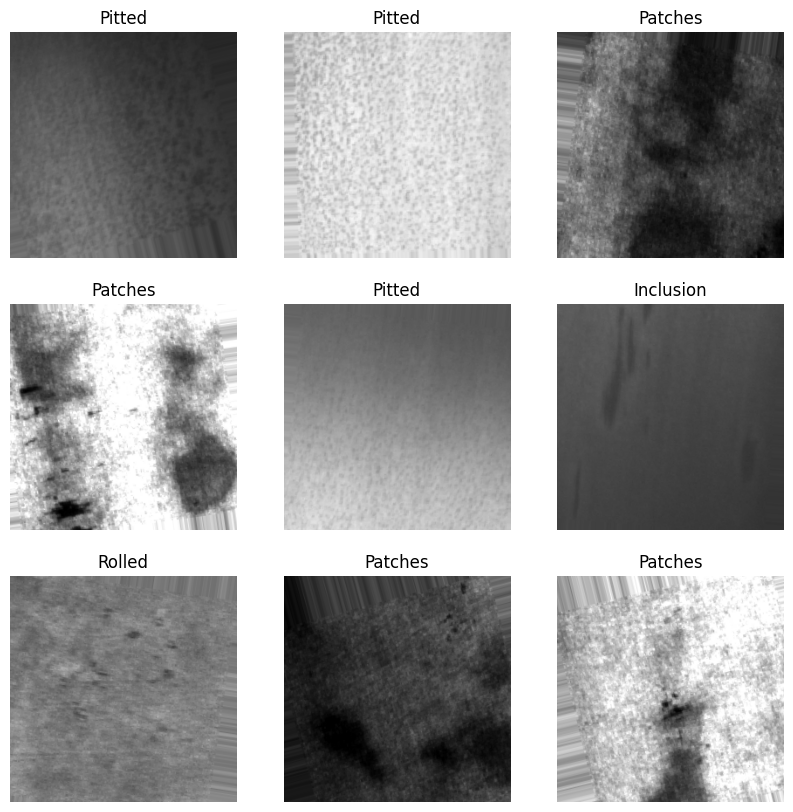

In [11]:
sample_images(train_generator, nrows=3, ncols=3)

In [12]:
image_batch

array([[[[0.36583203, 0.36583203, 0.36583203],
         [0.3411096 , 0.3411096 , 0.3411096 ],
         [0.3211813 , 0.3211813 , 0.3211813 ],
         ...,
         [0.23979668, 0.23979668, 0.23979668],
         [0.24522845, 0.24522845, 0.24522845],
         [0.24405767, 0.24405767, 0.24405767]],

        [[0.35677907, 0.35677907, 0.35677907],
         [0.35016254, 0.35016254, 0.35016254],
         [0.32480246, 0.32480246, 0.32480246],
         ...,
         [0.2340324 , 0.2340324 , 0.2340324 ],
         [0.22950594, 0.22950594, 0.22950594],
         [0.22646238, 0.22646238, 0.22646238]],

        [[0.34772614, 0.34772614, 0.34772614],
         [0.3592155 , 0.3592155 , 0.3592155 ],
         [0.32842365, 0.32842365, 0.32842365],
         ...,
         [0.22245227, 0.22245227, 0.22245227],
         [0.22064169, 0.22064169, 0.22064169],
         [0.22349168, 0.22349168, 0.22349168]],

        ...,

        [[0.27677995, 0.27677995, 0.27677995],
         [0.27587464, 0.27587464, 0.27587464]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from keras.layers import Dense

In [14]:
base_model = EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (260,260,3), pooling= 'max')

efficientnet_model = Sequential()
efficientnet_model.add(base_model)
efficientnet_model.add(Dense(units = 256, activation='relu'))
efficientnet_model.add(Dense(units = 6, activation = 'relu'))
# new_model.add(Dense(units = 1, activation='sigmoid'))
efficientnet_model.summary()



# model2 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (2, 2), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (2, 2), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(6 ,activation='softmax')])

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 1536)           │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,549 (42.64 MB)

 Trainable params: 11,091,246 (42.31 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [15]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [16]:
efficient_history = efficientnet_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 773s 12s/step - F1Score: 0.1424 - accuracy: 0.2198 - loss: 8.6452 - precision: 0.1710 - recall: 0.4878 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 11.0893 - val_precision: 0.1667 - val_recall: 0.3333
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 774ms/step - F1Score: 0.3377 - accuracy: 0.4703 - loss: nan - precision: 0.4579 - recall: 0.4749 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 794ms/step - F1Score: 0.3280 - accuracy: 0.4319 - loss: nan - precision: 0.5158 - recall: 0.4255 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 821ms/step - F1Score: 0.3331 - accuracy: 0.4418 - loss: nan - precision: 0.5267 - recall: 0.4379 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Ep

# Sequential

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [18]:
sequential_model = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
sequential_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [20]:
sequential_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
sequential_history = sequential_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 527ms/step - F1Score: 0.1967 - accuracy: 0.2238 - loss: 2.4182 - precision: 0.2417 - recall: 0.0358 - val_F1Score: 0.3837 - val_accuracy: 0.4444 - val_loss: 1.2195 - val_precision: 0.8000 - val_recall: 0.2222
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - F1Score: 0.5546 - accuracy: 0.5642 - loss: 1.1949 - precision: 0.7850 - recall: 0.2679 - val_F1Score: 0.5849 - val_accuracy: 0.6111 - val_loss: 0.9995 - val_precision: 0.6190 - val_recall: 0.3611
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 447ms/step - F1Score: 0.7462 - accuracy: 0.7455 - loss: 0.7093 - precision: 0.8124 - recall: 0.6315 - val_F1Score: 0.8163 - val_accuracy: 0.8194 - val_loss: 0.4340 - val_precision: 0.8806 - val_recall: 0.8194
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - F1Score: 0.7947 - accuracy: 0.7958 - loss: 0.5698 - precision: 0.8418 - recall: 0.7349 - val_F1Score: 0.8297 - val_accuracy: 0.8333 - val_loss: 0.5522 - val_precision: 0.8438 - val_recall: 0.7

# ResNet

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet import ResNet50
from keras.layers import Dense

In [24]:
base_model = ResNet50(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (200,200,3), pooling= 'max')

resnet_model = Sequential()
resnet_model.add(base_model)
resnet_model.add(Dense(units = 256, activation='relu'))
resnet_model.add(Dense(units = 6, activation = 'relu'))
# new_model.add(Dense(units = 1, activation='sigmoid'))
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,798 (91.99 MB)

 Trainable params: 24,060,678 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [25]:
resnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [26]:
resnet_history = resnet_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - F1Score: 0.3781 - accuracy: 0.4269 - loss: 4.1765 - precision: 0.1851 - recall: 0.7982 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 11.2481 - val_precision: 0.1667 - val_recall: 0.3333
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 511ms/step - F1Score: 0.6610 - accuracy: 0.7002 - loss: 3.3713 - precision: 0.4982 - recall: 0.7986 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 4.4333 - val_precision: 0.1667 - val_recall: 0.8333
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 510ms/step - F1Score: 0.6693 - accuracy: 0.6977 - loss: 1.0943 - precision: 0.3854 - recall: 0.9475 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 6.5139 - val_precision: 0.1667 - val_recall: 0.6667
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 515ms/step - F1Score: 0.8540 - accuracy: 0.8550 - loss: 1.1440 - precision: 0.5922 - recall: 0.9356 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 10.9898 - val_precision: 0.1667 - val_recall: 0.3

# EfficientNet Plots

In [66]:
print(efficient_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.57528955, 0.        , 0.        , 0.        , 0.45504582,
       0.34084505], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.7659574 , 0.        , 0.        , 0.        , 0.73355263,
       0.55918366], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.78823525, 0.        , 0.        , 0.        , 0.6468401 ,
       0.5679012 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.78171086, 0.        , 0.        , 0.        , 0.6533575 ,
       0.56314695], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8017751, 0.       , 0.       , 0.       , 0.6678899, 0.561151 ],
      dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8048047 , 0.        , 0.        , 0.        , 0.64695007,
       0.572327  ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.80838317, 0.        , 0.        , 0.        , 0.678

In [67]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

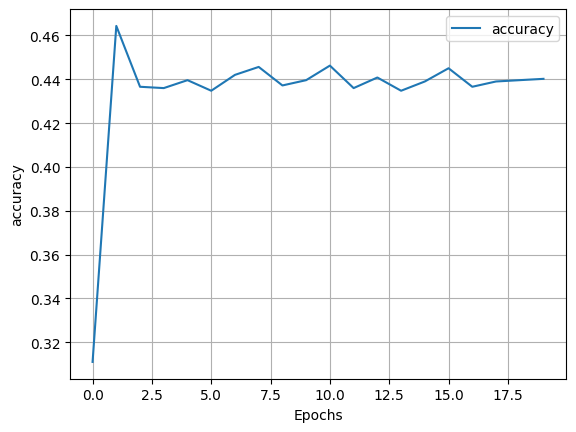

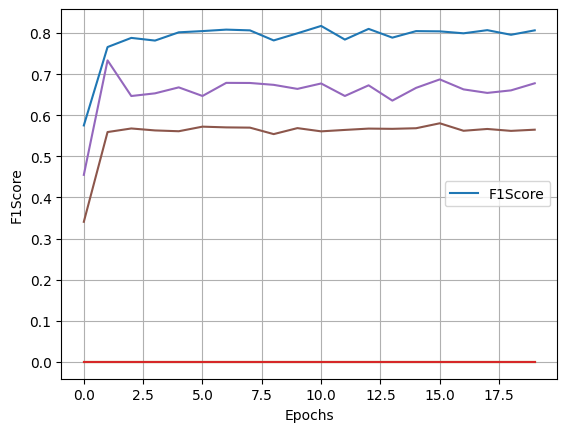

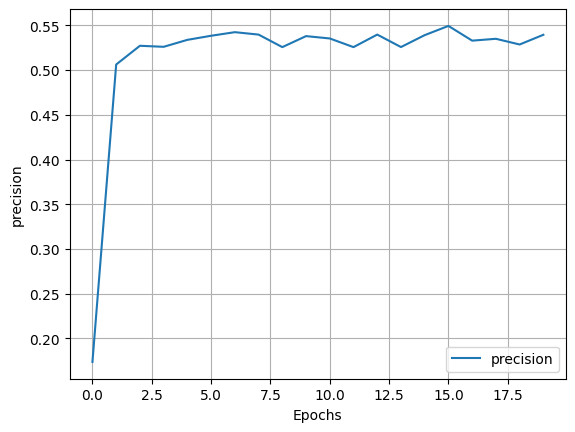

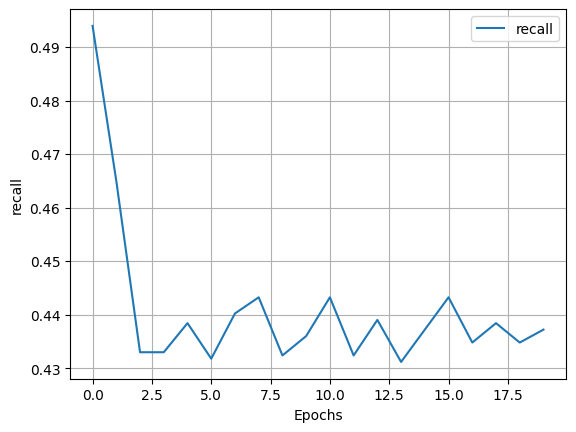

In [68]:
plot_history(efficient_history,"accuracy")
plot_history(efficient_history,"F1Score")
plot_history(efficient_history,"precision")
plot_history(efficient_history,"recall")

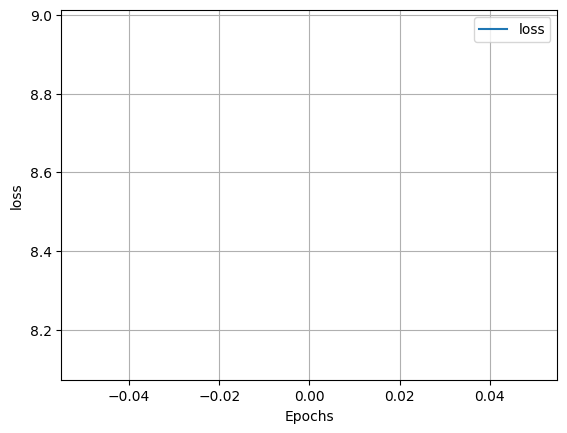

In [69]:
plot_history(efficient_history,"loss")

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [49]:
result = efficientnet_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - F1Score: 0.3213 - accuracy: 0.4314 - loss: nan - precision: 0.5167 - recall: 0.4314
Test loss, Test accuracy :  [nan, 0.4722222089767456, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.96      , 0.        , 0.        , 0.        , 0.8695651 ,
       0.48979583], dtype=float32)>, 0.5573770403862, 0.4722222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


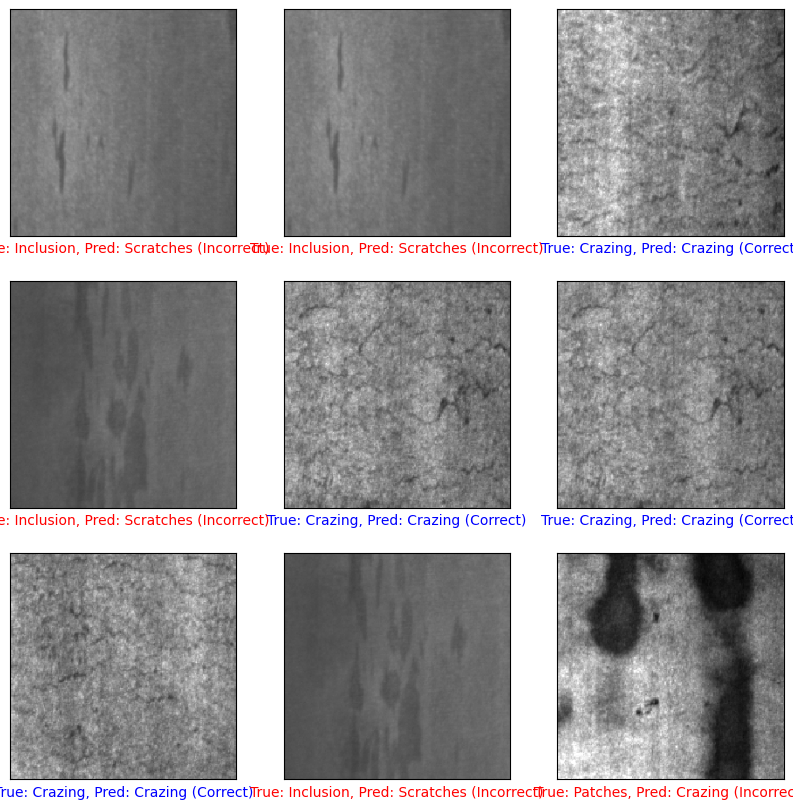

In [52]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = efficientnet_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# Sequential plots

In [70]:
print(sequential_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.36397743, 0.14035085, 0.3591731 , 0.4232954 , 0.1610169 ,
       0.26694041], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.7037701 , 0.60826445, 0.7155322 , 0.6401446 , 0.49173543,
       0.5259259 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8447653 , 0.6928327 , 0.86642593, 0.7039105 , 0.7286245 ,
       0.65561694], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.89009005, 0.75163394, 0.88043475, 0.7437379 , 0.8500881 ,
       0.7692307 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9302326 , 0.77852345, 0.9166666 , 0.7334593 , 0.87079644,
       0.7710371 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.92998195, 0.8130359 , 0.9233576 , 0.7897623 , 0.9184397 ,
       0.8343079 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9418181 , 0.8353552 , 0.93862814, 0.8096118 

In [71]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

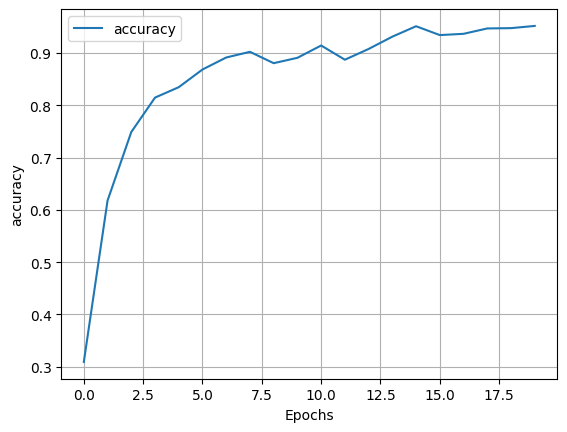

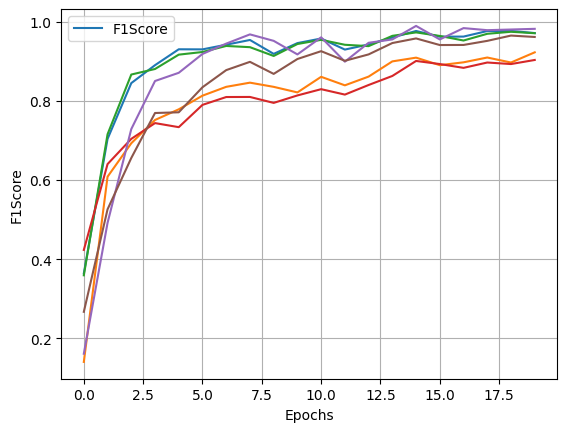

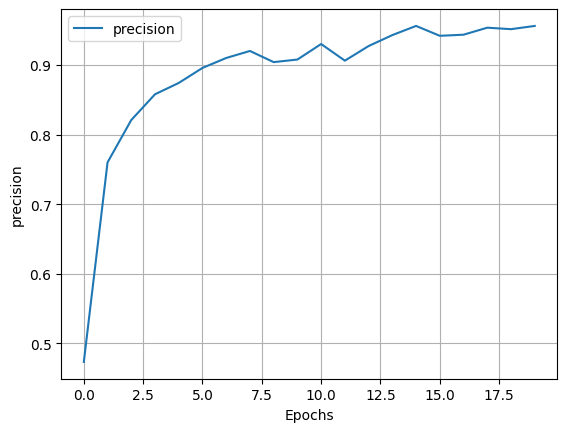

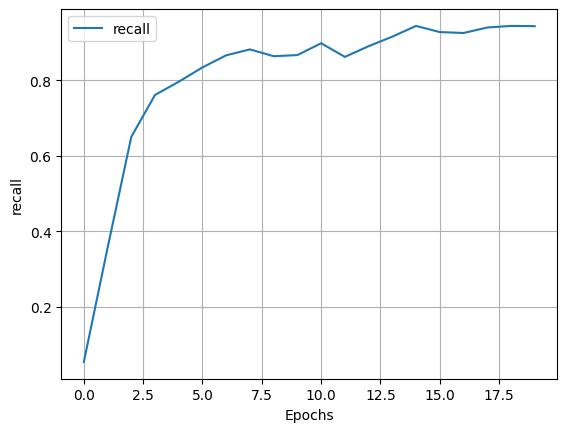

In [72]:
plot_history(sequential_history,"accuracy")
plot_history(sequential_history,"F1Score")
plot_history(sequential_history,"precision")
plot_history(sequential_history,"recall")

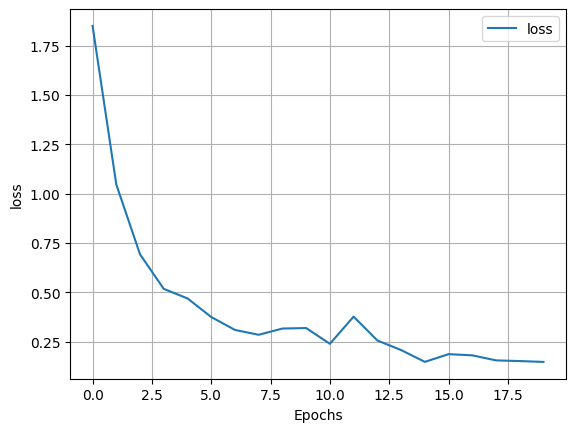

In [73]:
plot_history(sequential_history, "loss")

In [75]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [76]:
result = sequential_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - F1Score: 0.6474 - accuracy: 0.7352 - loss: 0.6911 - precision: 0.8002 - recall: 0.7166 
Test loss, Test accuracy :  [0.7370318174362183, 0.7361111044883728, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8571428 , 0.58823526, 0.8571428 , 0.6666666 , 0.68571424,
       0.73684204], dtype=float32)>, 0.7878788113594055, 0.7222222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


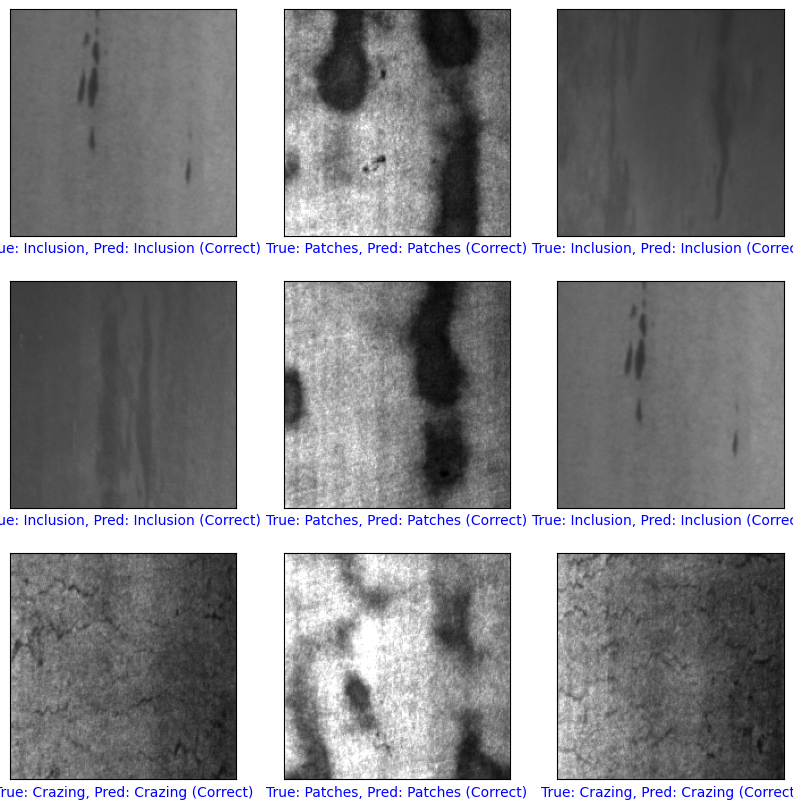

In [92]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = sequential_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# ResNet plots

In [80]:
print(resnet_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.02105263, 0.72936654, 0.78834355, 0.49162006, 0.78130835,
       0.6132075 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.37669897, 0.7122861 , 0.66932267, 0.5413793 , 0.79182154,
       0.86516845], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.6480937 , 0.805369  , 0.64570224, 0.74353874, 0.7931688 ,
       0.83491457], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8619402 , 0.80979276, 0.8370497 , 0.7963963 , 0.86851203,
       0.83175796], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.69047606, 0.85509837, 0.5707433 , 0.7302752 , 0.84797287,
       0.83491457], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.73684204, 0.78699183, 0.5756097 , 0.66949147, 0.8211243 ,
       0.90073526], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9263913 , 0.8566775 , 0.9176029 , 0.85380113

In [81]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

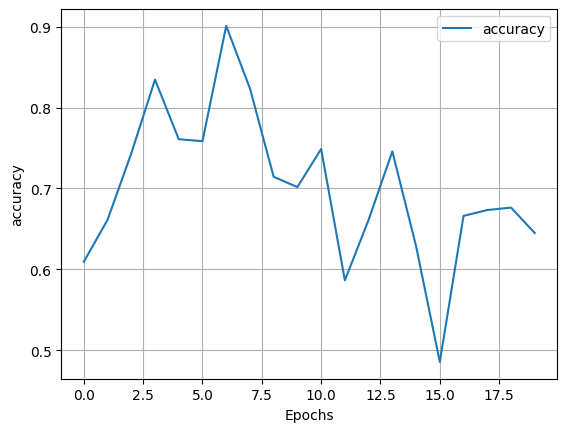

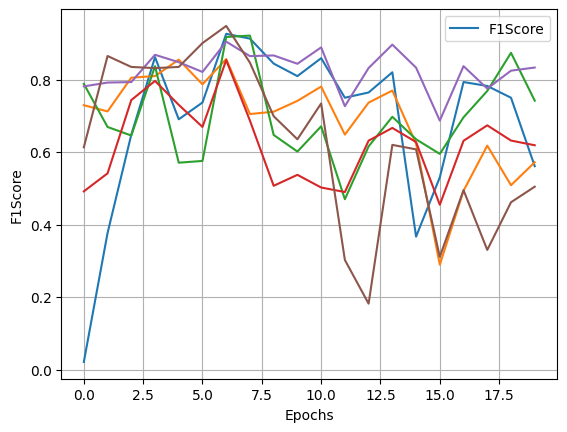

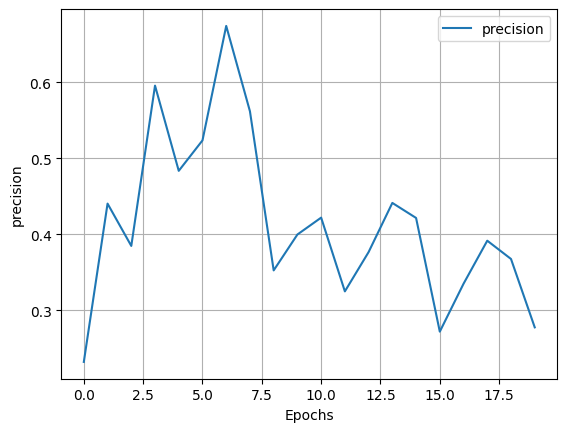

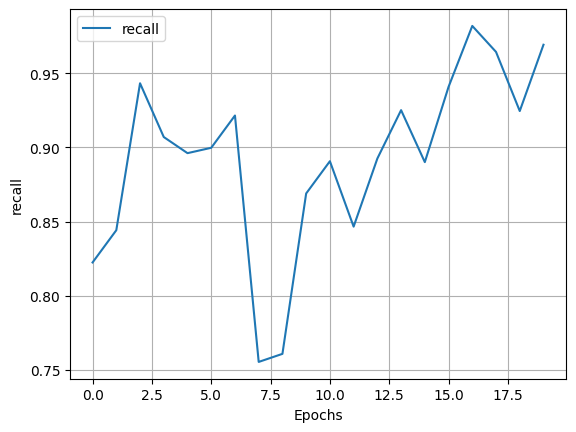

In [82]:
plot_history(resnet_history,"accuracy")
plot_history(resnet_history,"F1Score")
plot_history(resnet_history,"precision")
plot_history(resnet_history,"recall")

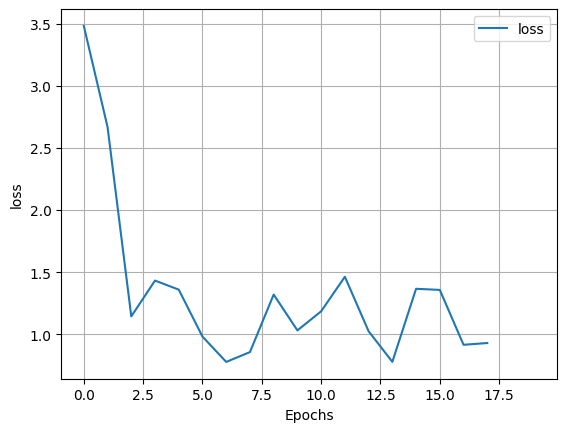

In [83]:
plot_history(resnet_history, "loss")

In [84]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [85]:
result = sequential_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - F1Score: 0.6474 - accuracy: 0.7352 - loss: 0.6911 - precision: 0.8002 - recall: 0.7166 
Test loss, Test accuracy :  [0.7370318174362183, 0.7361111044883728, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8571428 , 0.58823526, 0.8571428 , 0.6666666 , 0.68571424,
       0.73684204], dtype=float32)>, 0.7878788113594055, 0.7222222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


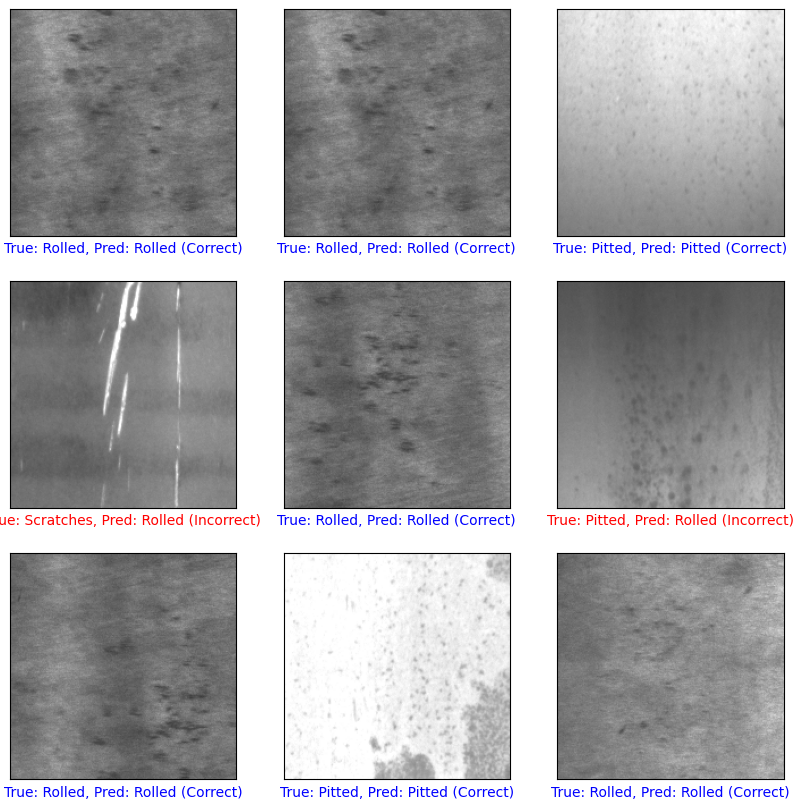

In [99]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = resnet_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# Сравнение всех моделей

In [100]:
import pandas as pd

# Define the accuracy and loss values for both models
efficientnet_accuracy = efficient_history.history['accuracy'][-1]
efficientnet_precision = efficient_history.history['precision'][-1]
efficientnet_recall = efficient_history.history['recall'][-1]
efficientnet_loss = efficient_history.history['loss'][-1]

sequential_accuracy = sequential_history.history['accuracy'][-1]
sequential_precision = sequential_history.history['precision'][-1]
sequential_recall = sequential_history.history['recall'][-1]
sequential_loss = sequential_history.history['loss'][-1]

resnet_accuracy = resnet_history.history['accuracy'][-1]
resnet_precision = resnet_history.history['precision'][-1]
resnet_recall = resnet_history.history['recall'][-1]
resnet_loss = resnet_history.history['loss'][-1]

# model1_accuracy = history.history['accuracy'][-1]
# model1_loss = history.history['loss'][-1]
# model2_accuracy = history2.history['accuracy'][-1]
# model2_loss = history2.history['loss'][-1]


# Create a dictionary with the accuracy and loss values
data = {'Model': ['EfficientNetB3', 'Sequential', 'ResNet50'],
        'Accuracy': [efficientnet_accuracy, sequential_accuracy, resnet_accuracy],
        'Recall': [efficientnet_recall, sequential_recall, resnet_recall],
        'Precision': [efficientnet_precision, sequential_precision, resnet_precision],
        'Loss': [efficientnet_loss, sequential_loss, resnet_loss]}

df = pd.DataFrame(data)
df

,Model,Accuracy,Recall,Precision,Loss
0,EfficientNetB3,0.440217,0.437198,0.539493,NaN
1,Sequential,0.951691,0.943841,0.955963,0.148391
2,ResNet50,0.644928,0.969203,0.277826,1.132403
